# Python Scripting for NetCDF Files

## Importing Packages

In [1]:
#!/usr/bin/env python3

import netCDF4 as nf # reads in nc file
import os            # allows access to OS
import csv           # import and manage csv files 
import numpy as np   # let's us deal with arrays 
import pandas as pd  # use of data in dataframe format 
import scipy
import xarray as xr       # deals with binary data as arrays 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt  # let's us plot 
from netCDF4 import Dataset      # let's us read the file 
%matplotlib inline

# importing packages to format time steps into dates 
import datetime as dt
from netCDF4 import Dataset, date2index, num2date, date2num

## Reading in files and assigning them to variables

In [2]:
tmp_data = nf.Dataset('air.mon.mean__M-O_2002-2011.nc')
sea_data = nf.Dataset('envisat_SIT_fb_snow-AMSR_sh_2002_2011_ease2_w50000.nc')

In [3]:
# Printing the keys and items for temperature dataset
print(type(tmp_data.dimensions.keys()))
for d in tmp_data.dimensions.items():
    print(d)

<class 'odict_keys'>
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 60
)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144
)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73
)
('level', <class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 17
)


In [4]:
# Printing the keys and items for SIT dataset
print(type(sea_data.dimensions.keys()))
for d in sea_data.dimensions.items():
    print(d)

<class 'odict_keys'>
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 55
)
('time_bounds', <class 'netCDF4._netCDF4.Dimension'>: name = 'time_bounds', size = 2
)
('u', <class 'netCDF4._netCDF4.Dimension'>: name = 'u', size = 850
)
('v', <class 'netCDF4._netCDF4.Dimension'>: name = 'v', size = 850
)


In [5]:
tmp_var = tmp_data.variables # reading in the variables for surface air temperature

In [6]:
# assinging the variables for Temperature
lon_t = tmp_var["lon"][:]
lat_t = tmp_var["lat"][:]
level = tmp_var["level"][:]
air = tmp_var["air"][:]
tmp_time = tmp_var["time"]

#lon_t, lat_t = np.meshgrid(lon_t, lat_t)

In [7]:
sea_var = sea_data.variables # reading in the variables for Sea Ice Thickness 

In [8]:
# assinging the variables for SIT
lon_sit = sea_var["longitude"]
lat_sit = sea_var["latitude"]
SIT = sea_var["SIT"]
SIT_time= sea_var["time"]

In [9]:
SIT.dimensions  # here there are 3 dimensions for Sea Ice Thickness: Time, Latitude, and Longitude

('time', 'u', 'v')

In [10]:
air.dump  # here there are 4 dimensions for surface air temperature: Time, Level, Latitude, and Longitude, but have made it into a masked array

<function MaskedArray.dump>

## Cleaning and Formating time, lat, and lon 

### 1. Format the lat and lon for the Surface Temperature  dataset

In [50]:
lat_t =  np.arange(-90,91,2.5)
lon_t =  np.arange(-180,181,2.5)

print("longitudes =\n{}".format(lon_t[:]))

print("latitudes =\n{}".format(lat_t[:]))

longitudes =
[-180.  -177.5 -175.  -172.5 -170.  -167.5 -165.  -162.5 -160.  -157.5
 -155.  -152.5 -150.  -147.5 -145.  -142.5 -140.  -137.5 -135.  -132.5
 -130.  -127.5 -125.  -122.5 -120.  -117.5 -115.  -112.5 -110.  -107.5
 -105.  -102.5 -100.   -97.5  -95.   -92.5  -90.   -87.5  -85.   -82.5
  -80.   -77.5  -75.   -72.5  -70.   -67.5  -65.   -62.5  -60.   -57.5
  -55.   -52.5  -50.   -47.5  -45.   -42.5  -40.   -37.5  -35.   -32.5
  -30.   -27.5  -25.   -22.5  -20.   -17.5  -15.   -12.5  -10.    -7.5
   -5.    -2.5    0.     2.5    5.     7.5   10.    12.5   15.    17.5
   20.    22.5   25.    27.5   30.    32.5   35.    37.5   40.    42.5
   45.    47.5   50.    52.5   55.    57.5   60.    62.5   65.    67.5
   70.    72.5   75.    77.5   80.    82.5   85.    87.5   90.    92.5
   95.    97.5  100.   102.5  105.   107.5  110.   112.5  115.   117.5
  120.   122.5  125.   127.5  130.   132.5  135.   137.5  140.   142.5
  145.   147.5  150.   152.5  155.   157.5  160.   162.5  165.  

### 2. Format the time for surface temperature

In [51]:
time_start = date2index(dt.datetime(2002, 1, 1), tmp_time, select="nearest")
time_end = date2index(dt.datetime(2011, 12, 31), tmp_time, select="nearest")

print(time_start)
print(time_end)

0
59


In [52]:
print(num2date(tmp_time[time_end], units=tmp_time.units, calendar=tmp_time.calendar))

2011-10-01 00:00:00


In [53]:
dates_T=num2date(tmp_time[:],tmp_time.units)
time_T=([date.strftime('%Y-%m-%d') for date in dates_T[:]])

### In order to better handle the time-steps, we convert the time into a dataframe with Pandas 


In [54]:
dates_pd = pd.to_datetime(time_T)
print(dates_pd)

DatetimeIndex(['2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01', '2005-05-01', '2005-06-01',
               '2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2007-05-01', '2007-06-01',
               '2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2009-05-01', '2009-06-01',
               '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2011-05-01', '2011-06-01',
      

In [55]:
# using the periods give certain periods, here we are getting the period of time for Temp, with months 
periods = dates_pd.to_period(freq='M')
periods

PeriodIndex(['2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10',
             '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10',
             '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10',
             '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10',
             '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10',
             '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10',
             '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10',
             '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10',
             '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10',
             '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10'],
            dtype='period[M]', freq='M')

### 1. Format the lat and lon for the surface SIT dataset

In [56]:
#lat_sit =  np.arange(-90,91,2.5)
#lon_sit =  np.arange(-180,181,2.5)

#print("longitudes =\n{}".format(lon_t[:]))

#print("latitudes =\n{}".format(lat_t[:]))

### 2. Format the time for surface temperature 

In [57]:
time_start = date2index(dt.datetime(2002, 1, 1), SIT_time, select="nearest")
time_end = date2index(dt.datetime(2011, 12, 31), SIT_time, select="nearest")

print(time_start)
print(time_end)

0
54


In [58]:
print(num2date(SIT_time[time_end], units=SIT_time.units, calendar=SIT_time.calendar))

2011-10-15 00:00:00


In [59]:
dates_SIT=num2date(SIT_time[:],SIT_time.units)
time_SIT=([date.strftime('%Y-%m-%d') for date in dates_SIT[:]])

In [60]:
print(time_T[:])

['2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01', '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01', '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01', '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01', '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01', '2006-09-01', '2006-10-01', '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01', '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01', '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01', '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01']


## Indexing to attain desired lat and lon for Surface Temperature to align with the Sea Ice Thickness Area 

In [61]:
# Slicing the 'z' axis, to only get the mean surface temp at 850 hPa where most convergence occurs
air_temp_at_surf=(air[:,2,:,:])
print(air_temp_at_surf)

In [62]:
#Finding index value of certain longitudes
print(np.where(lon_t==-62.5))
print(np.where(lon_t==-90))

air_temp_at_surf.shape

#Indexing to only get the Antarctic Circle
antcircle=air_temp_at_surf[:,36:47,:]

(array([47]),)
(array([36]),)


## Closing the nc files, now that we have assigned all variables 
#### Data written to a netCDF file is cached in memory, for better performance. This data is only written out to disk when the file is closed. Therefore, always remember to close a netCDF file when done with it.

In [63]:
tmp_data.close()

In [64]:
sea_data.close()

## Plotting and Functions

In [65]:
temp_mean=[]
for ii in range(len(antcircle)):
    mean = np.mean(antcircle[ii,:,:])
    temp_mean.append(mean)

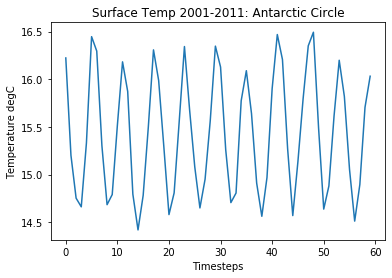

In [66]:
ave_plot = plt.plot(temp_mean)
plt.xlabel('Timesteps')
plt.ylabel('Temperature degC')
plt.title('Surface Temp 2001-2011: Antarctic Circle')
plt.show()

In [ ]:
#mask_months = periods.month==9
#d=air[mask_months,:,:]
#plt_map(d)

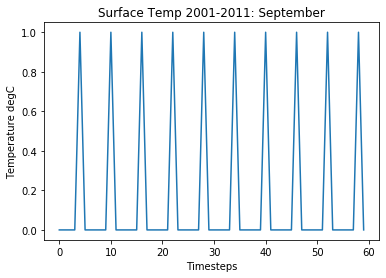

In [30]:
mask_months = periods.month== 9
plt.plot(mask_months)
plt.xlabel('Timesteps')
plt.ylabel('Temperature degC')
plt.title('Surface Temp 2001-2011: September')
plt.show()